# Задание 2 - Descriptive Statistics and Data Exploration
Perform data exploration and visualization without using the pandas_profiling library.

    https://github.com/rolling-scopes-school/ml-intro/tree/2022/2_data_exploration
    https://www.kaggle.com/c/tabular-playground-series-apr-2021/data?select=train.csv

In [1]:
## library input
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.__version__

'1.3.5'

### Цель работы
Провести анализ набора данных для выявления закономерностей и выработки гипотез. 

Посмотреть, какие признаки больше всего влияют на целевую переменную, а какие можно выбросить из рассмотрения.

# Context

The dataset is synthetic but based on a real dataset (in this case, the actual Titanic data!) and generated using a CTGAN. The statistical properties of this dataset are very similar to the original Titanic dataset.

https://www.kaggle.com/c/tabular-playground-series-apr-2021/data?select=train.csv



**Data Dictionary**

    Variable	Definition	                        Key
    survival	Survival	                        0 = No, 1 = Yes
    pclass          Ticket class                            1 = 1st, 2 = 2nd, 3 = 3rd
    sex     	Sex	
    Age	        Age in years	
    sibsp           # of siblings / spouses aboard the Titanic	
    parch	        # of parents / children aboard the Titanic	
    ticket	        Ticket number	
    fare	        Passenger fare	
    cabin	        Cabin number	
    embarked	Port of Embarkation	                C = Cherbourg, Q = Queenstown, S = Southampton


**Variable Notes**

    pclass: A proxy for socio-economic status (SES)
    1st = Upper
    2nd = Middle
    3rd = Lower

    age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

    sibsp: The dataset defines family relations in this way...
    Sibling = brother, sister, stepbrother, stepsister
    Spouse = husband, wife (mistresses and fiancés were ignored)

    parch: The dataset defines family relations in this way...
    Parent = mother, father
    Child = daughter, son, stepdaughter, stepson
    Some children travelled only with a nanny, therefore parch=0 for them.

# Data quality assessment

### 1 Основная информация о данных

In [2]:
df = pd.read_csv('train.csv')
print(df.shape)
df.head()

(100000, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [3]:
###  Verifying row count, Verifying column count
##   100000 rows, 12 columns 
df.shape

(100000, 12)

In [4]:
###   Verifying column types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
###   Checking for duplicates
##    No duplicates found
print(df.drop_duplicates().shape)

(100000, 12)


В датасете 100000 строк, 12 столбцов.

Повторяющихся строк нет.

### 2 Типы данных

In [6]:
###  Описание данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [7]:
### Названия столбцов 
columns = df.columns
columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
### Типы данных в столбцах
df.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [9]:
###  Уникальные значения в столцах типа object
for param in df.dtypes[df.dtypes == 'object'].index:
    print(param, df[param].unique())

Name ['Oconnor, Frankie' 'Bryan, Drew' 'Owens, Kenneth' ...
 'Childress, Charles' 'Caughlin, Thomas' 'Enciso, Tyler']
Sex ['male' 'female']
Ticket ['209245' '27323' 'CA 457703' ... 'PC 15008' '458654' '458074']
Cabin ['C12239' nan 'A7253' ... 'D12975' 'F12072' 'D17243']
Embarked ['S' 'C' 'Q' nan]


### 3 Пропущенные данные

In [10]:
df.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

Есть пропущенные данные в возрасте, номере билета, стоимости билета, каюте, месте посадки.

Проверим, связаны ли пропуски в разных столбцах.

In [11]:
##  нет строк, в которых отсутствуют все данные одновременно
print(df[df['Age'].isna() & df['Ticket'].isna() & 
         df['Cabin'].isna() & df['Embarked'].isna() & 
         df['Fare'].isna()].shape)

(0, 12)


In [12]:
###  нет информации о билете, каюте и цене - в 5 случаях
print('----- nan in Ticket, Cabin, Fare')
print(df[df['Ticket'].isna() & 
         df['Cabin'].isna() & 
         df['Fare'].isna()].shape)

----- nan in Ticket, Cabin, Fare
(5, 12)


In [13]:
### отсутсвие возраста бoльше всего пересекается с отсутствием Cabin
df[df['Age'].isna()].isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age            3292
SibSp             0
Parch             0
Ticket          156
Fare              5
Cabin          2247
Embarked          2
dtype: int64

In [14]:
missing = ['Age', 'Ticket', 'Cabin', 'Embarked', 'Fare']
for feature in missing:
    print("\n----- ", feature, "is null -----")
    print(df[df[feature].isnull()].isnull().sum())


-----  Age is null -----
PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age            3292
SibSp             0
Parch             0
Ticket          156
Fare              5
Cabin          2247
Embarked          2
dtype: int64

-----  Ticket is null -----
PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             156
SibSp             0
Parch             0
Ticket         4623
Fare              6
Cabin          4540
Embarked          9
dtype: int64

-----  Cabin is null -----
PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             2247
SibSp              0
Parch              0
Ticket          4540
Fare              92
Cabin          67866
Embarked         162
dtype: int64

-----  Embarked is null -----
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              2
S

In [15]:
###  Заменим пропущенные данные в очевидных случаях
###  как корректно заменить возраст и цену пока не ясно
df["Embarked"] = df["Embarked"].fillna("U")
df["Cabin"] = df["Cabin"].fillna("unknown")
df["Age"] = df["Age"].fillna(-1)

Итог про пропущенные данные

    Отсутствующие данные есть в столбцах 'Age', 'Ticket', 'Cabin', 'Embarked', 'Fare'
    Нет строк, в которых пропущены все эти данные одновременно.
    Больше всего отсутствуют данных о каюте - 67866 случаев.
    Отсутствие данных о возрасте (3292 случаев) больше всего пересекается с отсутствием Cabin (2247 случаев) и Ticket (156 случаев)
    Отсутствие данных о билете (4623) часто сопровождается отсутствием информации о каюте.
    Отсутствие данных о цене (134) часто сопровождается отсутствием информации о каюте.
    Отсутствие данных о месте посадки (250) часто сопровождается отсутствием информации о каюте.
    Пропуски данных не выглядят связанными друг с другом.


# Data exploration

    Understanding the meaning of each variable
    Data quality checks
    Visualization of and summary statistics for each variable
    Assessing the relationship between variables

## Exploring individual variables

    Histograms
    Boxplots
    Summary statistics
    z scores

In [16]:
### summary statistics
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,37.059890,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,19.330171,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,24.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,38.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [17]:
###  PassengerId - номер пассажира
##   Все значения разные, информации не несет.
print("----- Различных значений параметра PassengerId:  все значения различны")
print(len(df.PassengerId.unique().tolist()))

----- Различных значений параметра PassengerId:  все значения различны
100000


### Целевая переменная

In [18]:
###  Survived - целевая переменная
df.Survived.value_counts()

0    57226
1    42774
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

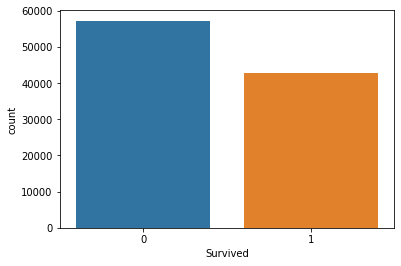

In [19]:
sns.countplot(x='Survived', data=df)

Survived - целевая переменная. Она принимает два значения: 

    0 - не выжил
    1 - выжил

В данных выживших меньше, чем невыживших, примерно на треть. Можно сказать, что датасет неплохо сбалансирован.

### Категориальные переменные

In [20]:
obj = df.dtypes[df.dtypes == 'object'].index
print(obj)
#fig, ax = plt.subplots(len(obj), figsize=(20,50))
#for i, param in enumerate(obj):
#    sns.boxplot(x=param, y='Survived', data=df, ax=ax[i]) 

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


#### Name

In [ ]:
###  Name - имя пассажира 
## 92144 различных значений
print("----- Различных имен пассажиров: " )
print(df.Name.value_counts().shape[0])

----- Различных имен пассажиров: 
92144


In [ ]:
df.Name.value_counts().index

Index(['Johnson, John', 'Smith, James', 'Smith, John', 'Johnson, William',
       'Smith, Michael', 'Smith, William', 'Jones, James', 'Smith, Robert',
       'Johnson, James', 'Smith, Mary',
       ...
       'Murphy, Louise', 'Marshall, Sam', 'Murillo, Sammy', 'Jordan, Kesha',
       'Smith, Allene', 'Davis, Andre', 'Rosenblum, Ronald', 'Landry, Ernesto',
       'Mcdonald, Frances', 'Enciso, Tyler'],
      dtype='object', length=92144)

Можно попробовать проанализировать фамилии и "собрать семьи из пассажиров".

#### Sex

----- Распределение по полу ---
male      56114
female    43886
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

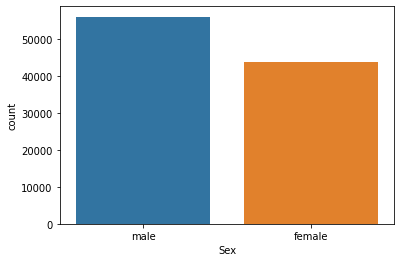

In [22]:
### Sex
param = 'Sex'
print("----- Распределение по полу ---")
print(df[param].value_counts())
sns.countplot(x=param, data=df) 


<AxesSubplot:xlabel='Survived', ylabel='count'>

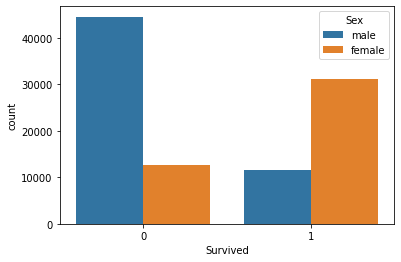

In [64]:
###  Распределение выживших по полу 
sns.countplot(x='Survived', hue='Sex', data=df)

In [ ]:
Процент выживших среди  женщин больше, чем выживших среди мужчин

#### Embarked - место посадки

S    72139
C    22187
Q     5424
U      250
Name: Embarked, dtype: int64


<AxesSubplot:xlabel='Embarked', ylabel='count'>

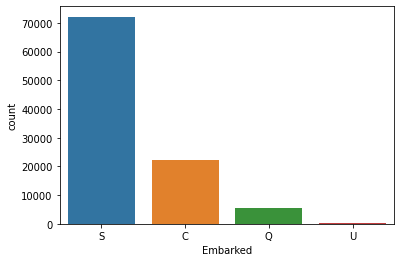

In [25]:
### Embarked - место посадки
print(df.Embarked.value_counts())
sns.countplot(x='Embarked', data=df)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

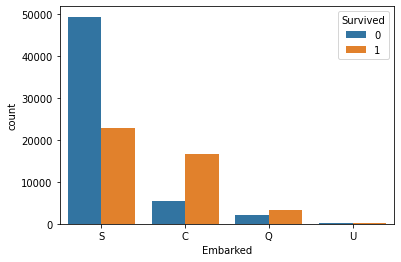

In [66]:
###  Распределение выживших по полу 
sns.countplot(hue='Survived', x='Embarked', data=df)

Среди севших на корабль в порту С больше процент выживших - возможно там садились какие-то особенные пассажиры?

#### Ticket, Cabin

In [45]:
###  Ticket - 75331 различных значений
print("----- Различных билетов: " )
print(df.Ticket.value_counts().shape[0])

----- Различных билетов: 
75331


In [47]:
###   'Cabin'
print("----- Различных кают:  как-то слишком много!" )
print(df.Cabin.value_counts().shape[0])

----- Различных кают:  как-то слишком много!
26993


Слишком много различных значений билетов и кают, невозможно сразу найти взаимосвязи.

### Количественные признаки

In [35]:
numf = df.dtypes[(df.dtypes == 'float64') | (df.dtypes == 'int64') ].index
print(numf)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


#### Возраст

----- Распределение по возрасту ---
174 различный значений!


<AxesSubplot:xlabel='Age', ylabel='count'>

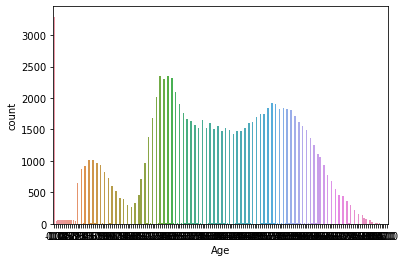

In [43]:
### Возраст
param = 'Age'
print("----- Распределение по возрасту ---")
print(df[param].unique().shape[0], 'различный значений!')
sns.countplot(x=param, data=df) ### невнятный график

In [58]:
###  встречающиеся значения возраста 
ages = sorted(df.Age.unique().tolist())
print(len(ages), "различных значений. Вот они:")
print(*ages)

174 различных значений. Вот они:
-1.0 0.08 0.17 0.25 0.33 0.42 0.5 0.58 0.67 0.75 0.83 0.92 1.0 1.5 2.0 2.5 3.0 3.5 4.0 4.5 5.0 5.5 6.0 6.5 7.0 7.5 8.0 8.5 9.0 9.5 10.0 10.5 11.0 11.5 12.0 12.5 13.0 13.5 14.0 14.5 15.0 15.5 16.0 16.5 17.0 18.0 18.5 19.0 19.5 20.0 20.5 21.0 21.5 22.0 22.5 23.0 23.5 24.0 24.5 25.0 25.5 26.0 26.5 27.0 27.5 28.0 28.5 29.0 29.5 30.0 30.5 31.0 31.5 32.0 32.5 33.0 33.5 34.0 34.5 35.0 35.5 36.0 36.5 37.0 37.5 38.0 38.5 39.0 39.5 40.0 40.5 41.0 41.5 42.0 42.5 43.0 43.5 44.0 44.5 45.0 45.5 46.0 46.5 47.0 47.5 48.0 48.5 49.0 49.5 50.0 50.5 51.0 51.5 52.0 52.5 53.0 53.5 54.0 54.5 55.0 55.5 56.0 56.5 57.0 57.5 58.0 58.5 59.0 59.5 60.0 60.5 61.0 61.5 62.0 62.5 63.0 63.5 64.0 65.0 65.5 66.0 66.5 67.0 67.5 68.0 68.5 69.0 69.5 70.0 70.5 71.0 71.5 72.0 72.5 73.0 73.5 74.0 74.5 75.0 75.5 76.0 77.0 78.0 78.5 79.0 80.0 80.5 81.0 82.0 83.0 84.0 85.0 86.0 87.0


Встречается 174 значений возраста. Возраст указан с точностью до полугода, а для детей до года еще чаще. Нам, скорее всего, не нужна такая подробность. Заменим возраст на возрастную категорию.

In [59]:
### заменяем возраст возрастной группой
age_bins = [0, 5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90]
df["AgeGr"] = pd.cut(df["Age"], bins=age_bins).astype(object)

In [60]:
ages = df.AgeGr.unique().tolist()
print(*ages)

nan (0, 5] (15, 20] (20, 25] (30, 40] (5, 10] (25, 30] (60, 70] (50, 60] (40, 50] (70, 80] (10, 15] (80, 90]


<AxesSubplot:xlabel='AgeGr', ylabel='count'>

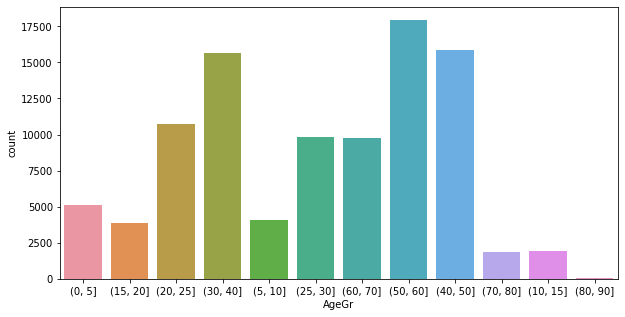

In [61]:
plt.figure(figsize=(10,5))
sns.countplot(x='AgeGr', data=df)

<AxesSubplot:xlabel='count', ylabel='AgeGr'>

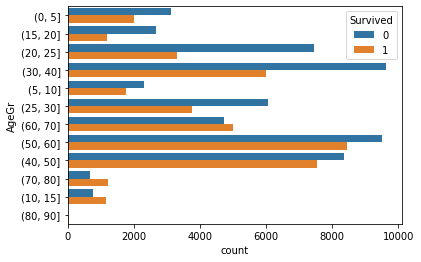

In [63]:
sns.countplot(hue='Survived', y='AgeGr', data=df)

###  PClass

3    41006
1    30315
2    28679
Name: Pclass, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

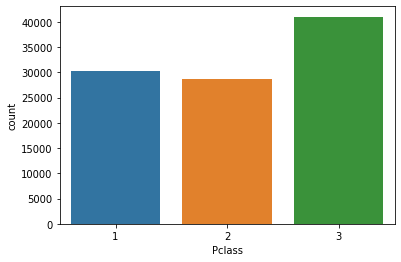

In [21]:
###  Pclass - класс каюты
print(df.Pclass.value_counts())
sns.countplot(x='Pclass', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

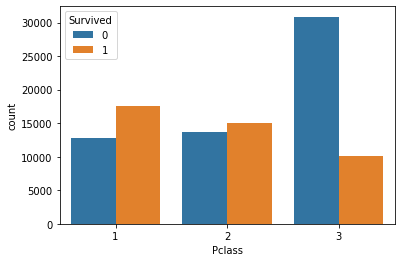

In [36]:
###  Распределение выживших по классу
sns.countplot(hue='Survived', x='Pclass', data=df)

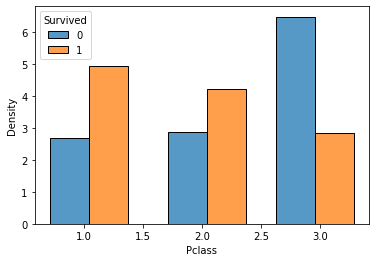

In [81]:
ax = sns.histplot(x=df['Pclass'], hue=df['Survived'], multiple="dodge", shrink=8,
                  stat='density', common_norm=False)

Чем выше класс, тем больше доля выживших.

#### Количество родственников

SibSp и Parch - отражают количество родственников на корабле

Text(0.5, 1.0, 'Родители / дети')

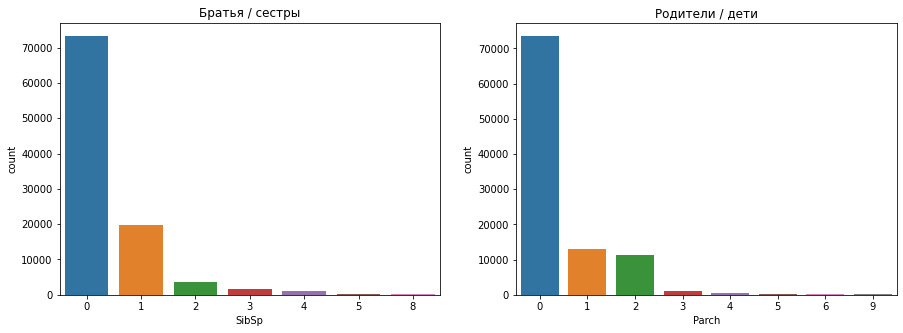

In [55]:
plt.figure(figsize=(15,5))
plt.subplot(121)
param = 'SibSp'
plt.title("Братья / сестры")
sns.countplot(x=param, data=df) 

plt.subplot(122)
param = 'Parch'
sns.countplot(x=param, data=df) 
plt.title("Родители / дети")

Построим новый признак: количество родственников = кол-во братьев/сестер + кол-во родителей/детей

In [53]:
df['Relat'] = df.Parch + df.SibSp

Text(0.5, 1.0, 'Родcтвенники')

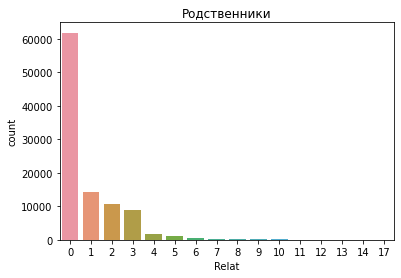

In [56]:
param = 'Relat'
sns.countplot(x=param, data=df) 
plt.title("Родcтвенники")

Text(0.5, 1.0, 'Родcтвенники')

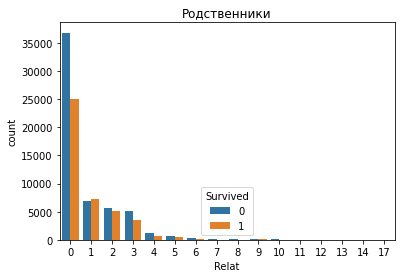

In [80]:
param = 'Relat'
sns.countplot(x=param, hue="Survived", data=df) 
plt.title("Родcтвенники")

In [ ]:
Встреаются огромные семьи - до 17 человек. Ну или gan перемудрил при генерации данных.

Доля выживших не зависит явно от количества родственников. Но доля выживших одиноких явно меньше.

#### Fare

Text(0.5, 1.0, 'Цена билета')

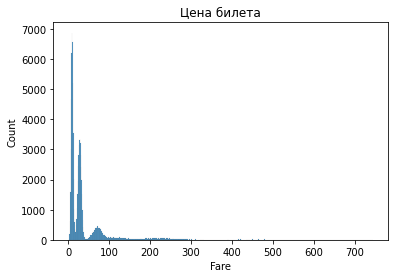

In [74]:
param = 'Fare'
sns.histplot(x=param, data=df) 
plt.title("Цена билета")

В линейном масштабе видно, что много дешевых билетов. Построим в логарифмическом масштабе.

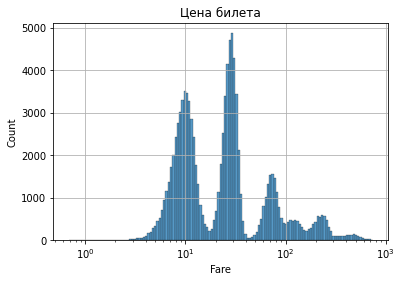

In [76]:
param = 'Fare'
sns.histplot(x=param, data=df, log_scale=True) 
plt.title("Цена билета")
plt.grid()

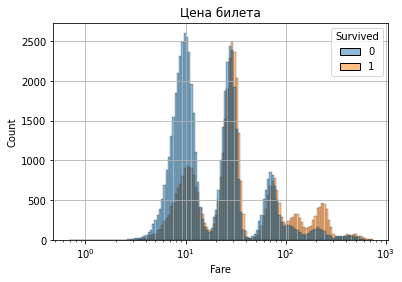

In [77]:
param = 'Fare'
sns.histplot(x=param, hue="Survived", data=df, log_scale=True) 
plt.title("Цена билета")
plt.grid()

Больше выживших с более дорогими билетами.

## Examining relationship between variables

    Boxplots
    Heatmaps
    Scatterplots

In [40]:
print("---- survived by class and sex")
print(df.groupby(["Pclass", "Sex"])["Survived"].value_counts(normalize=True))

---- survived by class and sex
Pclass  Sex     Survived
1       female  1           0.768279
                0           0.231721
        male    0           0.633265
                1           0.366735
2       female  1           0.769024
                0           0.230976
        male    0           0.753359
                1           0.246641
3       female  1           0.568416
                0           0.431584
        male    0           0.893811
                1           0.106189
Name: Survived, dtype: float64


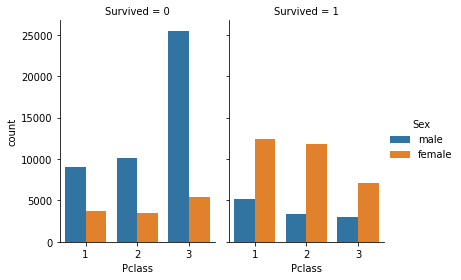

In [42]:
g = sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=df, kind="count",
                height=4, aspect=.7);

Видна явная зависимость выживаемости от пола и класса каюты.

<AxesSubplot:xlabel='Pclass', ylabel='count'>

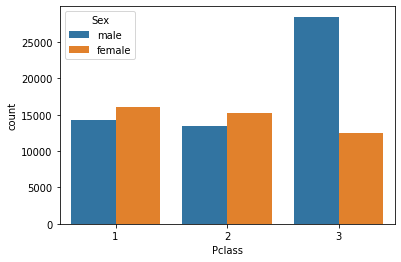

In [37]:
###  Гендерный состав пассажиров разных классов 
sns.countplot(x="Pclass", hue="Sex", data=df)

В третьем классе мужчин больше, чем женщин более, чем в два раза.

In [96]:
### Введем новую категорию - дети
def child(row):
    return "Child" if row['Age'] < 14 else row['Sex']

df['Child'] = df.apply(child, axis=1 ) 

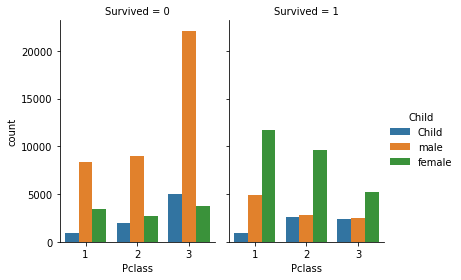

In [97]:
g = sns.catplot(x="Pclass", hue="Child", col="Survived",
                data=df, kind="count",
                height=4, aspect=.7);

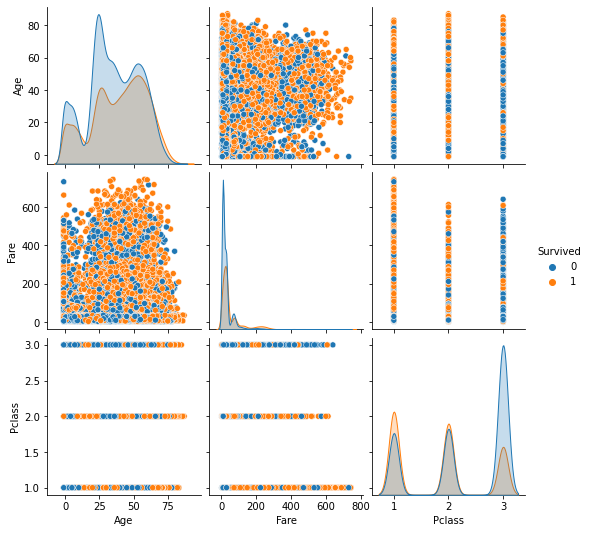

In [85]:
sns.pairplot(df, vars=["Age", "Fare", "Pclass"], hue="Survived", dropna=True)

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

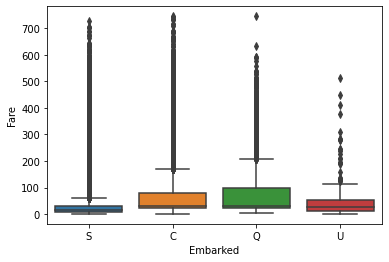

In [89]:
sns.boxplot(y='Fare', x='Embarked', data=df)

Идея о том, что в порту C более дорогие пассажиры, похоже, не подтверждается.

# Summary

Видна явная зависимость выживаемости от пола и класса каюты.
Также обнаружена связь с ценой билета.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ed60024c-3bce-4ff3-8f17-51e7b533774d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>